In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

# Reading Data

-  Data preprocessing steps:
- 1. Remove spaces and special characters: Tokenization can be affected by spaces, causing uneven token sizes.
- 2. Categorize specific columns: For example, replace the 'rating' column with the corresponding grade provided by the Korean Racing Authority.
- 3. Delete unnecessary columns.

In [2]:
df = pd.read_csv("./data/race_v4.csv", index_col=False)
df.head()

,age,hrName,jkName,meet,ord,plcOdds,rank,rating,ratingOd,rcDate,...,rcTime,sex,trName,track,trackOd,weather,wgBudam,wgHr,winOdds,hrSpd
0,2,히즈그레이스,송경윤,부경,1,1.7,혼4,0,6등급,20141228,...,62.1,수,김남중,건조(3%),건조,맑음,53.0,504,8.1,16.10306
1,2,예스인디드,채규준,부경,2,1.0,혼4,0,6등급,20141228,...,62.7,수,양귀선,건조(3%),건조,맑음,53.0,495,1.6,15.94896
2,2,콰이어트랩터,조성곤,부경,3,1.4,혼4,0,6등급,20141228,...,63.0,수,윤영훈,건조(3%),건조,맑음,53.0,493,4.1,15.87302
3,3,월드히어로,후지이,부경,4,3.4,혼4,0,6등급,20141228,...,63.1,수,이상영,건조(3%),건조,맑음,55.0,498,20.3,15.84786
4,2,퍼스트무버,박금만,부경,5,5.4,혼4,0,6등급,20141228,...,63.8,수,유충열,건조(3%),건조,맑음,53.0,465,53.2,15.67398


# Delete specific columns:
 - 'hrName': Although useful for improving model performance, its inclusion significantly slows down the model generation process during one-hot encoding due to the large number of resulting columns.
 - 'WinOds' and 'plcOds': These columns represent dividend rates, but are deleted since the values are unknown until just before the game.
 - 'rating' and 'track': These columns were created during data processing for categorization purposes.
 - 'rcDate': This column is unnecessary as it simply represents the match date.
 - 'ord': This column, representing ranking results, is excluded as it is not available for analysis data.

In [3]:
df.drop(["hrName", "winOdds", "rating", "track", "plcOdds", "rcDate", "rcTime", "ord", "track", "rcNo", "rcNoOd", "rcDist"], axis = 1, inplace = True)

In [4]:
df.head()

,age,jkName,meet,rank,ratingOd,sex,trName,trackOd,weather,wgBudam,wgHr,hrSpd
0,2,송경윤,부경,혼4,6등급,수,김남중,건조,맑음,53.0,504,16.10306
1,2,채규준,부경,혼4,6등급,수,양귀선,건조,맑음,53.0,495,15.94896
2,2,조성곤,부경,혼4,6등급,수,윤영훈,건조,맑음,53.0,493,15.87302
3,3,후지이,부경,혼4,6등급,수,이상영,건조,맑음,55.0,498,15.84786
4,2,박금만,부경,혼4,6등급,수,유충열,건조,맑음,53.0,465,15.67398


# Text data tokenization and one-hot encoding:

####  Text data processing options:
- Replace with numeric data.
- Utilize one-hot encoding.

#### Substitution to numeric data:
- Difficult without sufficient domain knowledge.
- For instance, in the 'rating' column, 60 and 80 are numeric, but the difference of 20 may not reflect a real difference.
- Similarly, for track humidity data, directly replacing 3% and 10% humidity with 0.03 and 0.1 is not advisable.

#### Therefore, textual data is employed for model generation through tokenization and one-hot encoding.


In [5]:
# Select a text data column
text_list = ["jkName", "meet", "ratingOd", "sex", "trName", "trackOd", "weather", "rank"]

In [6]:
# Tokenization and one-hot encoding are added to the original data frame
for i in text_list:
    t = Tokenizer()
    t.fit_on_texts(df[i])
    encoded = t.texts_to_sequences(df[i])
    one_hot = to_categorical(encoded)
    df = pd.concat([df, pd.DataFrame(one_hot)], axis= 1)

In [7]:
# Delete the original text column
df.drop(text_list, axis = 1, inplace = True)

In [8]:
df.head()

,age,wgBudam,wgHr,hrSpd,0,1,2,3,4,5,...,30,31,32,33,34,35,36,37,38,39
0,2,53.0,504,16.10306,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,53.0,495,15.94896,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,53.0,493,15.87302,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,55.0,498,15.84786,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,53.0,465,15.67398,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# The dependent variable is hrSpd (horse speed)
X = df.drop(["hrSpd"], axis = 1)
Y = df["hrSpd"]

In [10]:
X.head()

,age,wgBudam,wgHr,0,1,2,3,4,5,6,...,30,31,32,33,34,35,36,37,38,39
0,2,53.0,504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,53.0,495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,53.0,493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,55.0,498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,53.0,465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Training/Verification Data Isolation
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [12]:
# simple multi-layered neural network structure
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation="relu", input_shape = (X.shape[1], )))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(1))

In [13]:
# Setting the optimization method, loss calculation method, and evaluation method to train the model
model.compile(optimizer='nadam',loss='mse', metrics=['mse'])
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-dense-model.h5", save_best_only = True)
early_stoppinb_cb = keras.callbacks.EarlyStopping(patience = 7, restore_best_weights = True)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               52700     
                                                                 
 dense_1 (Dense)             (None, 20)                2020      
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 54741 (213.83 KB)
Trainable params: 54741 (213.83 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
history = model.fit(x_train, y_train, epochs = 1000, batch_size = 32,
                    validation_data = (x_val, y_val), callbacks = [checkpoint_cb, early_stoppinb_cb])

Epoch 1/1000
6021/6021 [==============================] - 5s 749us/step - loss: 7.7348 - mse: 7.7348 - val_loss: 0.3286 - val_mse: 0.3286
Epoch 2/1000
 211/6021 [>.............................] - ETA: 4s - loss: 4.5468 - mse: 4.5468

/Users/jihoonhong/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6021/6021 [==============================] - 4s 678us/step - loss: 3.5877 - mse: 3.5877 - val_loss: 0.3053 - val_mse: 0.3053
Epoch 3/1000
6021/6021 [==============================] - 4s 702us/step - loss: 1.7938 - mse: 1.7938 - val_loss: 0.2128 - val_mse: 0.2128
Epoch 4/1000
6021/6021 [==============================] - 4s 736us/step - loss: 0.7407 - mse: 0.7407 - val_loss: 0.1712 - val_mse: 0.1712
Epoch 5/1000
6021/6021 [==============================] - 4s 720us/step - loss: 0.3489 - mse: 0.3489 - val_loss: 0.1626 - val_mse: 0.1626
Epoch 6/1000
6021/6021 [==============================] - 4s 664us/step - loss: 0.2498 - mse: 0.2498 - val_loss: 0.1582 - val_mse: 0.1582
Epoch 7/1000
6021/6021 [==============================] - 4s 635us/step - loss: 0.2422 - mse: 0.2422 - val_loss: 0.1596 - val_mse: 0.1596
Epoch 8/1000
6021/6021 [==============================] - 4s 635us/step - loss: 0.2417 - mse: 0.2417 - val_loss: 0.1575 - val_mse: 0.1575
Epoch 9/1000
6021/6021 [=======================

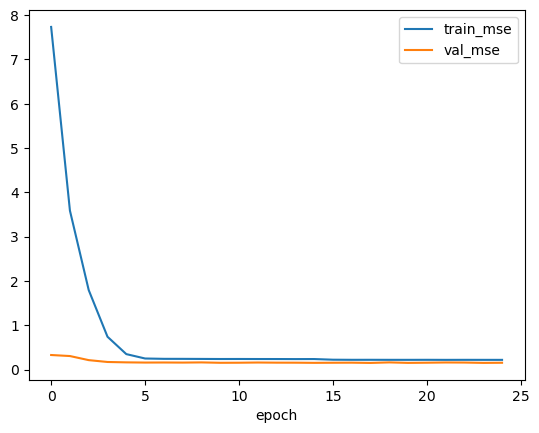

In [16]:
# Visualization of mse by epoch of training/verification data
plt.figure()
plt.plot(history.history["mse"], label = "train_mse")
plt.plot(history.history["val_mse"], label = "val_mse")

plt.legend()
plt.xlabel("epoch")
plt.show()

In [17]:
# Predicting Horse Speed Using Verification Data
model.evaluate(x_val, y_val)

1506/1506 [==============================] - 0s 270us/step - loss: 0.1500 - mse: 0.1500


[0.14998270571231842, 0.14998270571231842]

In [18]:
x_pre = model.predict(x_val)

1506/1506 [==============================] - 0s 234us/step


In [19]:
x_pre = pd.Series(x_pre.flatten())

In [20]:
y_val2 = y_val[:]
y_val2.index = range(0, len(y_val))

In [21]:
# Calculation of the difference between predicted horse speed and actual horse speed
diff = y_val2 - x_pre

In [22]:
# Statistical data of speed differences
diff.describe()

count    48169.000000
mean         0.015093
std          0.386986
min         -7.679773
25%         -0.218263
50%          0.037405
75%          0.268687
max          1.876929
dtype: float64

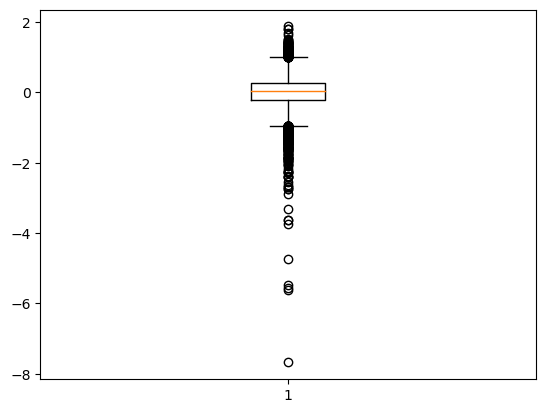

In [23]:
# boxplot of error data
plt.figure()
plt.boxplot(diff)

plt.show()

- Predicting horse speed and generating an ascending order ranking based on predictions.
    - A deep learning model is created that predicts speed with an average error of 0.001

In [24]:
sample_index = [86460,86461,86462,86463,86464,86465,86466,86467]

In [25]:
sample_run = df.iloc[sample_index]

In [26]:
sample_run

,age,wgBudam,wgHr,hrSpd,0,1,2,3,4,5,...,30,31,32,33,34,35,36,37,38,39
86460,2,55.0,500,16.59751,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86461,2,55.0,498,16.08579,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86462,2,55.0,493,16.04278,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86463,2,53.0,465,16.00000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86464,2,55.0,503,15.85205,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86465,2,55.0,502,15.83113,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86466,2,53.0,439,15.78947,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86467,2,55.0,458,15.72739,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
sample_X = sample_run.drop(["hrSpd"], axis = 1)
sample_Y = sample_run["hrSpd"]

In [28]:
sample_pre = model.predict(sample_X)

1/1 [==============================] - 0s 6ms/step


In [29]:
sample_pre

array([[15.7415905],
       [15.761385 ],
       [15.687096 ],
       [15.681424 ],
       [15.62108  ],
       [15.652866 ],
       [15.62042  ],
       [15.5493765]], dtype=float32)

In [30]:
sorted_score = sorted(sample_pre, reverse = True)
ranks = [sorted_score.index(s) + 1 for s in sample_pre]
print(ranks)

[2, 1, 3, 4, 6, 5, 7, 8]


In [32]:
X.shape[1]

526

In [ ]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming 'y_true' is the true labels and 'y_pred' is the predicted labels
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Visualize accuracy as a bar chart
plt.bar(['Accuracy'], [accuracy], color='blue')
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()